In [43]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [44]:
print(os.listdir('../input'))

['14-celebrity-faces-dataset', 'augment.ipynb', 'load.ipynb', 'main.ipynb', 'X.pickle', 'y.pickle']


In [45]:
# Distribution graphs (histogram/bar graph) of column data
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()

In [46]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

In [47]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()

In [48]:
import keras,os
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPool2D , Flatten
from keras.preprocessing.image import ImageDataGenerator
import numpy as np

In [49]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D


import pickle

pickle_in = open("X.pickle","rb")
X = pickle.load(pickle_in)

pickle_in = open("y.pickle","rb")
y = pickle.load(pickle_in)

In [50]:
X[0]

array([[[ 10,  18,  21],
        [  5,  14,  17],
        [  8,  19,  21],
        ...,
        [200, 195, 192],
        [200, 195, 192],
        [201, 196, 193]],

       [[ 21,  30,  33],
        [ 22,  31,  34],
        [ 31,  43,  45],
        ...,
        [202, 197, 195],
        [202, 197, 195],
        [204, 199, 195]],

       [[ 67,  76,  79],
        [ 43,  52,  55],
        [ 26,  38,  40],
        ...,
        [203, 198, 195],
        [203, 198, 195],
        [204, 199, 196]],

       ...,

       [[206, 201, 198],
        [207, 202, 199],
        [208, 203, 200],
        ...,
        [207, 195, 193],
        [208, 196, 194],
        [208, 196, 194]],

       [[207, 202, 199],
        [207, 202, 199],
        [208, 203, 200],
        ...,
        [202, 190, 188],
        [202, 190, 188],
        [202, 190, 188]],

       [[208, 203, 200],
        [208, 203, 200],
        [208, 203, 200],
        ...,
        [199, 187, 185],
        [199, 187, 185],
        [199, 187, 185]]

In [51]:
np.array(X).shape

(1319, 224, 224, 3)

In [52]:
np.array(y).shape

(1319,)

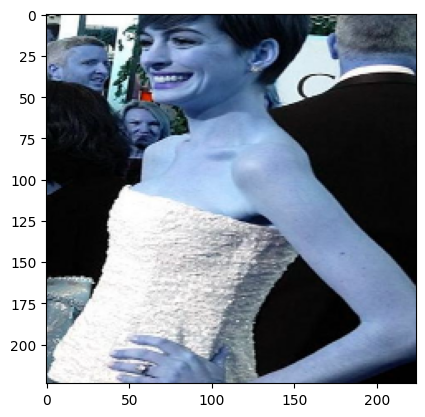

In [54]:
plt.imshow(X[28])
plt.show()

In [55]:
from keras.optimizers import Adam
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=X.shape[1:]),
    MaxPooling2D(pool_size=(2,2)) ,# down sampling the output instead of 28*28 it is 14*14
    Dropout(0.2),
    Flatten(), # flatten out the layers
    Dense(32,activation='relu'),
    Dense(1,activation = 'softmax')
    
])
cnn_model.compile(loss ='mean_squared_error', optimizer=Adam(lr=0.001),metrics =['accuracy'])

ValueError: ('Could not interpret optimizer identifier:', <keras.optimizers.Adam object at 0x000001DCE746AC18>)

In [25]:
cnn_model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 253, 253, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 126, 126, 32)     0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 126, 126, 32)      0         
                                                                 
 flatten_3 (Flatten)         (None, 508032)            0         
                                                                 
 dense_6 (Dense)             (None, 32)                16257056  
                                                                 
 dense_7 (Dense)             (None, 1)                 33        
                                                      

In [14]:
X = X/255.0

In [22]:
y=np.array(y)/14

In [26]:

history = cnn_model.fit(
    X,
    y,
    batch_size=1,
    epochs=7,
    verbose=1,
    # validation_data=(x_validate,y_validate),
    validation_split=0.3
)

Epoch 1/7
945/945 [==============================] - 82s 86ms/step - loss: 0.4812 - accuracy: 0.0000e+00 - val_loss: 0.4901 - val_accuracy: 0.0000e+00
Epoch 2/7
945/945 [==============================] - 85s 90ms/step - loss: 0.4812 - accuracy: 0.0000e+00 - val_loss: 0.4901 - val_accuracy: 0.0000e+00
Epoch 3/7
379/945 [===========>..................] - ETA: 46s - loss: 0.4819 - accuracy: 0.0000e+00

KeyboardInterrupt: 

In [ ]:
X = X/255.0
# X=X/1
y=np.array(y)/14
model = Sequential()

# model.add(Conv2D(256, (3, 3), input_shape=X.shape[1:]))
model.add(Conv2D(5, (3, 3)))

model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())  # this converts our 3D feature maps to 1D feature vectors

# model.add(Dense(64))
# model.add(Activation('relu'))

model.add(Dense(1))
model.add(Activation('sigmoid'))
# SparseCategoricalCrossentropy
# loss='mean_squared_error'
model.compile(loss='SparseCategoricalCrossentropy',
              optimizer='adam',
              metrics=['accuracy'])



# model.fit(X, np.array(y), batch_size=32, epochs=10, validation_split=0.3)


ValueError: This model has not yet been built. Build the model first by calling `build()` or by calling the model on a batch of data.

In [ ]:
# model_2 = Sequential()

# model_2.add(Conv2D(filters=64,kernel_size=(3,3),input_shape=X.shape[1:],padding="same", activation="relu"))
# model_2.add(Conv2D(filters=64,kernel_size=(3,3),padding="same", activation="relu"))

# model_2.add(MaxPool2D(pool_size=(2,2)))

# model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(Conv2D(filters=128, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(MaxPool2D(pool_size=(2,2)))
# model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(Conv2D(filters=256, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(MaxPool2D(pool_size=(2,2)))
# model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# model_2.add(MaxPool2D(pool_size=(2,2)))
# # model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model_2.add(Conv2D(filters=512, kernel_size=(3,3), padding="same", activation="relu"))
# # model_2.add(MaxPool2D(pool_size=(2,2)))

# model_2.add(Flatten())
# model_2.add(Dense(units=4096,activation="relu"))
# model_2.add(Dense(units=4096,activation="relu"))
# model_2.add(Dense(units=1, activation="softmax"))

# from keras.optimizers import Adam
# opt = Adam(lr=0.001)
# model_2.compile(optimizer=opt, loss=keras.losses.categorical_crossentropy, metrics=['accuracy'])

In [ ]:
# model_2.summary()

NameError: name 'model_2' is not defined

In [ ]:
# from keras.callbacks import ModelCheckpoint, EarlyStopping
# # checkpoint = ModelCheckpoint("vgg16_1.h5", monitor='val_acc', verbose=1, save_best_only=True, save_weights_only=False, mode='auto', period=1)
# # early = EarlyStopping(monitor='val_acc', min_delta=0, patience=20, verbose=1, mode='auto')
# # hist = model_2.fit_generator(steps_per_epoch=100,generator=X,validation_data= np.array(y),epochs=10,callbacks=[checkpoint,early])
# model_2.fit(X,np.array(y),epochs=5,batch_size=30)

Epoch 1/5
 7/46 [===>..........................] - ETA: 11:41 - loss: 0.0000e+00 - accuracy: 0.0476

In [ ]:
# import keras                                            
# # print(keras.applications.__dir__())
# # from keras.applications.vgg16 import VGG16
# print(keras.applications.vgg16.__dir__())
# model_2=keras.applications.vgg16

# print(model_2.summary())
# # model_2.fit(X,y)
# # model = VGG16()
# # model.summary()

AttributeError: module 'keras' has no attribute 'applications'

In [ ]:
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16
# load the model
model = VGG16()
# load an image from file
# image = load_img('mug.jpg', target_size=(224, 224))
# convert the image pixels to a numpy array
# image = img_to_array(image)
# reshape data for the model
# image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
# image = preprocess_input(image)
# predict the probability across all output classes
yhat = model.predict(X)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

Exception: URL fetch failure on https://storage.googleapis.com/tensorflow/keras-applications/vgg16/vgg16_weights_tf_dim_ordering_tf_kernels.h5: 403 -- Forbidden

jadid

In [24]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D



In [25]:
model=keras.applications.mobilenet.MobileNet()

In [26]:
predict=model.predict(X)

In [28]:
print(predict)
print(y)

[[5.38541281e-05 4.43513412e-03 8.39818502e-04 ... 2.19191946e-07
  2.15668424e-05 3.33009113e-04]
 [2.95910098e-07 2.50963634e-03 6.08515911e-05 ... 8.70918697e-08
  1.32592859e-05 4.03626217e-03]
 [2.55188002e-06 2.43511982e-04 6.55345139e-05 ... 1.51364773e-07
  7.44217687e-05 6.91203226e-04]
 ...
 [8.05678813e-09 2.68053009e-06 4.71430788e-08 ... 1.66289862e-08
  4.22527989e-07 1.78093949e-04]
 [5.58293948e-07 3.54669210e-05 4.96006032e-05 ... 9.84467192e-07
  1.05276104e-06 3.43318358e-02]
 [4.40161330e-06 9.15351484e-05 5.77794017e-05 ... 6.69043231e-07
  1.41098335e-05 8.98787985e-04]]
[2, 3, 9, 6, 2, 0, 10, 1, 0, 7, 9, 0, 0, 9, 3, 7, 4, 10, 10, 5, 11, 0, 0, 9, 0, 4, 3, 10, 11, 6, 4, 8, 8, 0, 7, 3, 9, 6, 7, 6, 9, 1, 7, 6, 0, 6, 6, 10, 2, 1, 5, 0, 5, 4, 6, 8, 3, 1, 10, 8, 7, 3, 7, 0, 7, 5, 1, 11, 8, 0, 6, 9, 0, 7, 7, 6, 6, 0, 7, 0, 8, 9, 11, 7, 5, 7, 1, 6, 7, 8, 5, 0, 6, 6, 3, 6, 11, 4, 11, 10, 9, 0, 0, 8, 8, 10, 8, 0, 0, 2, 7, 11, 8, 6, 9, 11, 0, 11, 7, 9, 11, 10, 10, 2, 10, 5, 

In [82]:
pretrained_model = tf.keras.applications.DenseNet201(
            include_top=False ,
            weights='imagenet', #tuning10 weights='noisy-student' instead of 'imagenet'
                                #Self-training with Noisy Student improves ImageNet classification https://arxiv.org/abs/1911.04252) 
            #pooling='avg', #tuning1
            input_shape=[224,224, 3]
        )

pretrained_model.trainable = True #tuning8 pretrained_model.trainable = True

model = tf.keras.Sequential([
            pretrained_model, #Base pretrained on ImageNet to extract features from images

            tf.keras.layers.GlobalAveragePooling2D(), ##Attach a new head to act as a classifier
            #tf.keras.layers.Dropout(0.3), #tuning3
            tf.keras.layers.Dense(14, activation='softmax')
        ])

In [83]:
model.compile(optimizer='adam'
,loss='sparse_categorical_crossentropy'
,metrics=['sparse_categorical_accuracy'],
)

In [84]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Model)          (None, 7, 7, 1920)        18321984  
_________________________________________________________________
global_average_pooling2d_7 ( (None, 1920)              0         
_________________________________________________________________
dense_7 (Dense)              (None, 14)                26894     
Total params: 18,348,878
Trainable params: 18,119,822
Non-trainable params: 229,056
_________________________________________________________________


In [73]:
tf.keras.utils.plot_model(model, show_shapes=True)

Failed to import pydot. You must install pydot and graphviz for `pydotprint` to work.


In [ ]:
X=X/224

In [85]:
history = model.fit(
        X,np.array(y),
        validation_split=0.3,
        epochs=7,
        batch_size=20,
        # callbacks=[lr_callback, checkpoint], # Model weights are saved at the end of every epoch, if it's the best seen so far
        #workers = 3 #tuning5 https://www.tensorflow.org/tutorials/distribute/multi_worker_with_keras
        # class_weight = weight_per_class #tuning11
    )

Train on 923 samples, validate on 396 samples
Epoch 1/7
380/923 [===========>..................] - ETA: 41:09 - loss: 1.4071 - sparse_categorical_accuracy: 0.5737